# PC Test Environ Maker

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

from tangle import Tangle, node_graph, watcher, analyser
from PC_classes import mal_node

plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

## Experiment 1

This is a test experiment, I didn't need to actually make a conflicting transaction here as we aren't monitoring the orphan status of the original transaction. We are instead measuring the number of tip confirmations.

This experiment will test the number of tip confirmations of a system built with a parasite chain and a system with the same number of transactions without the parastie chain.

### PC Tangle

Here I declare the node graph used for the experiments. In this case it is 4 normal nodes and one malicious node.

In [2]:
t = Tangle(rate=3, tip_selection='mcmc', plot=True)
ng = node_graph(t)
w = watcher(t, ng, 1)
for n in range(4):
    ng.new_node()

ng.new_node(mal=True, watch=w)

First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000021DDB01A480>]
Edges []
Node IDS [0]
Weights [[0, 1515, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000021DDB01A480>, <tangle.node object at 0x0000021DDC591730>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 1515, 1], [1, 1062, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000021DDB01A480>, <tangle.node object at 0x0000021DDC591730>, <tangle.node object at 0x0000021DBBC1B590>]
Edges [(1, 0), (2, 0), (2, 1)]
Node IDS [0, 1, 2]
Weights [[0, 1515, 1], [1, 1062, 1], [2, 998, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000021DDB01A480>, <tangle.node object at 0x0000021DDC591730>, <tangle.node object at 0x0000021DBBC1B590>, <tangle.node object at 0x0000021DDC50B0B0>]
Edges [(1, 0), (2, 0), (2, 1), (3, 1), (3, 2)]
Node IDS [0, 1, 2, 3]
Weights [[0, 1515, 1], [1, 1062, 1], [2, 998, 1], [3, 136, 1]]
Finished

Next I design the transactions in the series. As this is a low load tangle I add a wait time based on the rate of the tangle (in this case 3) to ensure the rate of transactions (and therefore confirmations) is slower. The simulation is then ran for a minute. The output will be recorded in csv files and output.

In [3]:
for trial in range(1,10):
    ### Instantiating all the classes   ###
    t = Tangle(rate=3, tip_selection='mcmc', plot=True)
    ng = node_graph(t)
    w = watcher(t, ng, trial)

    ### Adding nodes to the node graph  ###
    for n in range(4):
        ng.new_node()
    ng.new_node(mal=True, watch=w)

    ### Adding Transactions ###

    for j in range(2):
        for i in range(4):
            ng.nodes[i].issue_transaction()
            w.update()
    
    ### Adding the PC   ###

    ng.nodes[-1].issue_bad_transaction()
    PC_issue_time = t.time                  # This was added to keep track of when the transaction is added.
    w.update()
    ng.nodes[-1].spam_transactions(10)
    badNode = ng.nodes[-1]
    print(badNode.chain)

    ### Running the simulation  ###

    while t.time < 60:
        node = np.random.randint(0, 4)
        dt_time = np.random.exponential(1.0/t.rate)
        t.time += dt_time
        ng.nodes[node].issue_transaction()
        w.update()
        print(t.time)

    w.output_to_sheet()



First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000021DBBC1B710>]
Edges []
Node IDS [0]
Weights [[0, 1255, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000021DBBC1B710>, <tangle.node object at 0x0000021DDC5094C0>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 1255, 1], [1, 321, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000021DBBC1B710>, <tangle.node object at 0x0000021DDC5094C0>, <tangle.node object at 0x0000021DBBC1B5C0>]
Edges [(1, 0), (2, 1), (2, 0)]
Node IDS [0, 1, 2]
Weights [[0, 1255, 1], [1, 321, 1], [2, 231, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000021DBBC1B710>, <tangle.node object at 0x0000021DDC5094C0>, <tangle.node object at 0x0000021DBBC1B5C0>, <tangle.node object at 0x0000021DBBC1B3E0>]
Edges [(1, 0), (2, 1), (2, 0), (3, 2), (3, 1)]
Node IDS [0, 1, 2, 3]
Weights [[0, 1255, 1], [1, 321, 1], [2, 231, 1], [3, 586, 1]]
Finished up

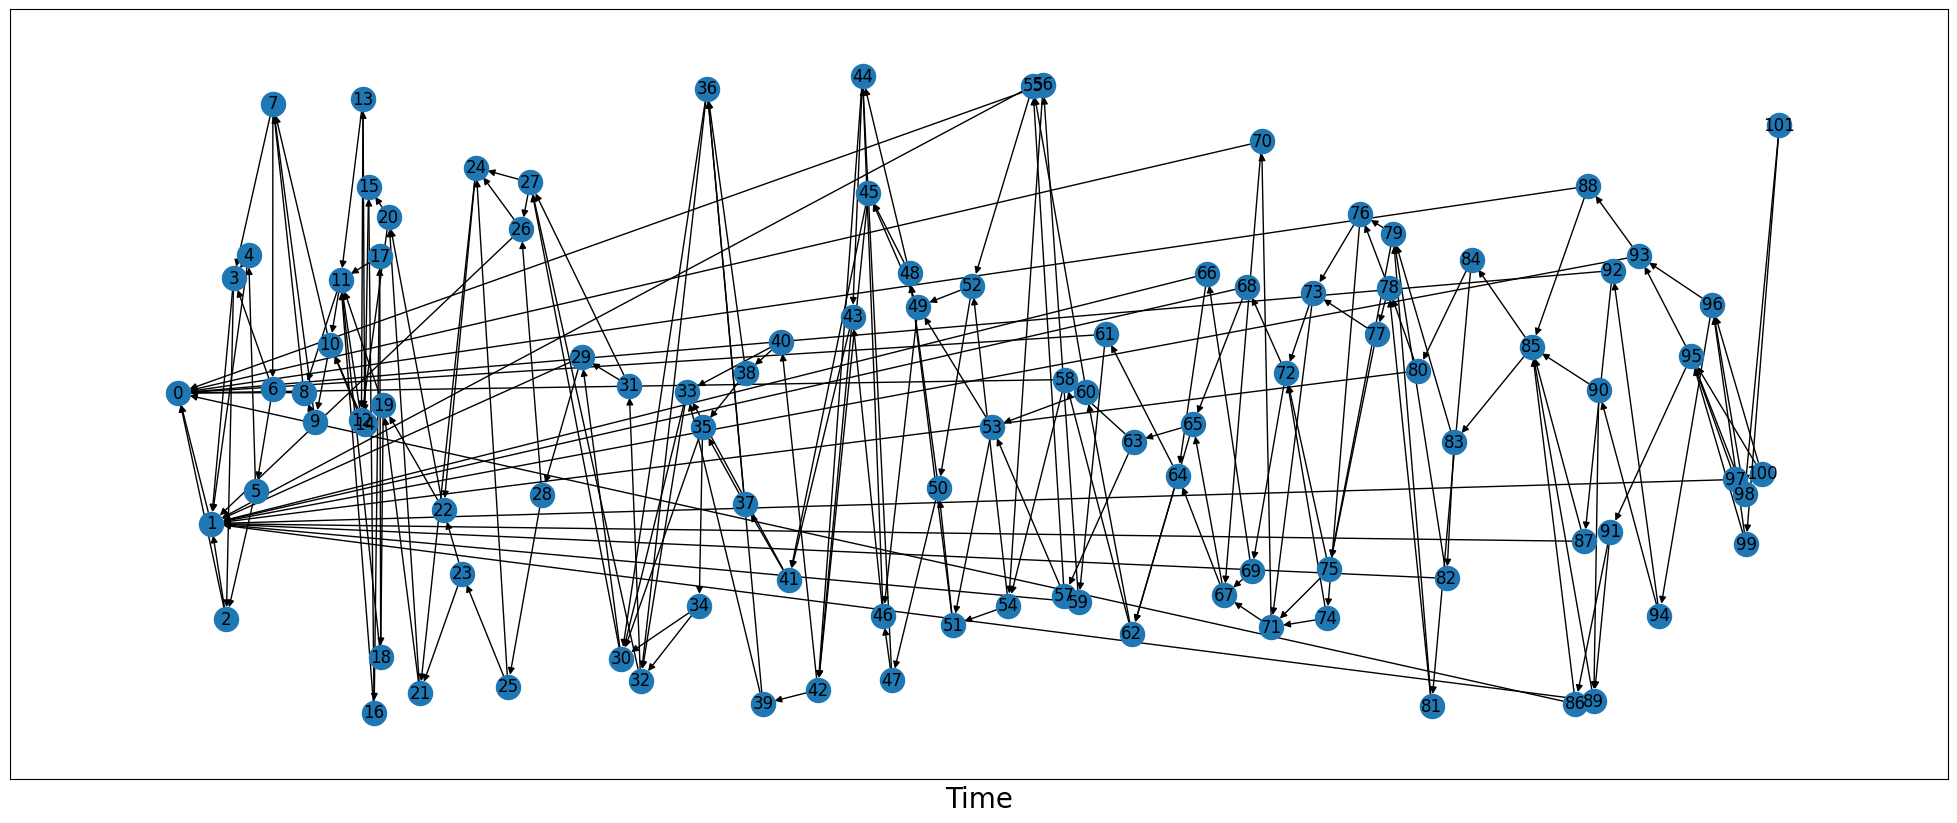

In [4]:
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.figure(figsize=(25, 10))
t.plot()

[1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 6, 6, 6, 6, 7, 7, 7, 7, 8, 13, 15, 15, 16, 20, 20, 20, 20, 22, 23, 23, 23, 27, 27, 27, 27, 32, 32, 32, 32, 32, 34, 35, 36, 36, 36, 36, 38, 42, 43, 43, 44, 46, 46, 47, 48, 49, 49, 49, 49, 52, 52, 53, 54, 54, 54, 56, 57, 57, 58, 60, 62, 65, 66, 66, 68, 69, 70, 71, 71, 72, 74, 74, 76, 78, 78, 79, 79, 79, 79, 79, 80, 84, 84, 84, 84, 85, 86, 86, 86, 91] [1.0, 1.2421483085082667, 1.8107803111115057, 2.085040915710274, 2.6483280796853905, 2.912486828470781, 3.550458771063486, 3.5589274246699976, 4.7213537042952884, 5.145918235508888, 5.705763875911015, 6.1055770108128, 6.884997448479401, 6.9453207806787605, 7.0067095317925485, 7.155314069769565, 7.362274107635791, 7.572978326377242, 7.608985154478665, 7.704490915229778, 7.912091518105706, 9.081756809694562, 9.97018059127049, 10.669094027531346, 11.192561901005751, 12.389038004476207, 12.888555497211323, 13.227136821259514, 13.667972343199589, 15.158452860244198, 16.646475386873146, 16.93900282164555, 17.37

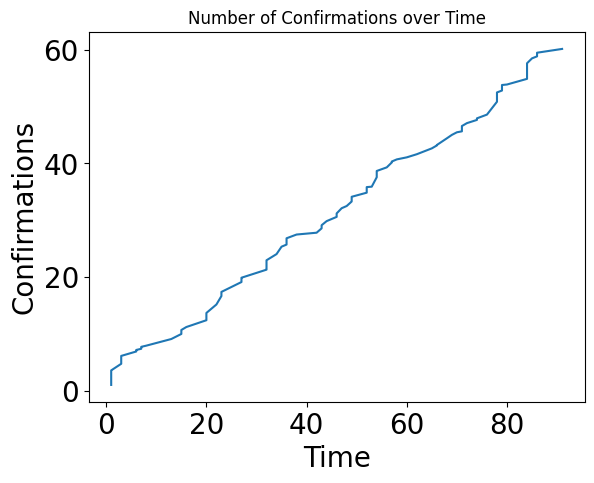

In [5]:
w.plot_confirm_over_time()
print(PC_issue_time)

In [6]:
a = analyser()
results = a.get_res(9)

[[1, 1.0, 17], [2, 1.0, 24], [3, 1.0, 39], [4, 1.68, 25], [5, 2.96, 25], [6, 4.260869565217392, 23], [7, 6.9655172413793105, 29], [8, 11.157894736842104, 19], [9, 13.285714285714286, 14], [10, 16.4, 15], [11, 17.692307692307693, 13], [12, 18.53846153846154, 13], [13, 20.666666666666668, 9], [14, 21.933333333333334, 15], [15, 23.25, 12], [16, 24.636363636363637, 11], [17, 26.35, 20], [18, 28.470588235294116, 17], [19, 30.0, 12], [20, 30.8, 15], [21, 32.57142857142857, 14], [22, 33.63636363636363, 11], [23, 35.1764705882353, 17], [24, 36.22222222222222, 9], [25, 38.0, 11], [26, 38.916666666666664, 12], [27, 39.8, 10], [28, 42.833333333333336, 12], [29, 42.888888888888886, 18], [30, 46.81818181818182, 11], [31, 46.27272727272727, 11], [32, 48.05263157894737, 19], [33, 48.833333333333336, 12], [34, 51.8, 15], [35, 53.5, 12], [36, 53.166666666666664, 12], [37, 56.142857142857146, 7], [38, 56.46153846153846, 13], [39, 58.36842105263158, 19], [40, 59.25, 16], [41, 58.55555555555556, 9], [42, 

In [7]:
import pandas as pd

[[1, 1.0, 17], [2, 1.0, 24], [3, 1.0, 39], [4, 1.68, 25], [5, 2.96, 25], [6, 4.260869565217392, 23], [7, 6.9655172413793105, 29], [8, 11.157894736842104, 19], [9, 13.285714285714286, 14], [10, 16.4, 15], [11, 17.692307692307693, 13], [12, 18.53846153846154, 13], [13, 20.666666666666668, 9], [14, 21.933333333333334, 15], [15, 23.25, 12], [16, 24.636363636363637, 11], [17, 26.35, 20], [18, 28.470588235294116, 17], [19, 30.0, 12], [20, 30.8, 15], [21, 32.57142857142857, 14], [22, 33.63636363636363, 11], [23, 35.1764705882353, 17], [24, 36.22222222222222, 9], [25, 38.0, 11], [26, 38.916666666666664, 12], [27, 39.8, 10], [28, 42.833333333333336, 12], [29, 42.888888888888886, 18], [30, 46.81818181818182, 11], [31, 46.27272727272727, 11], [32, 48.05263157894737, 19], [33, 48.833333333333336, 12], [34, 51.8, 15], [35, 53.5, 12], [36, 53.166666666666664, 12], [37, 56.142857142857146, 7], [38, 56.46153846153846, 13], [39, 58.36842105263158, 19], [40, 59.25, 16], [41, 58.55555555555556, 9], [42, 

Text(0, 0.5, 'Confirmations')

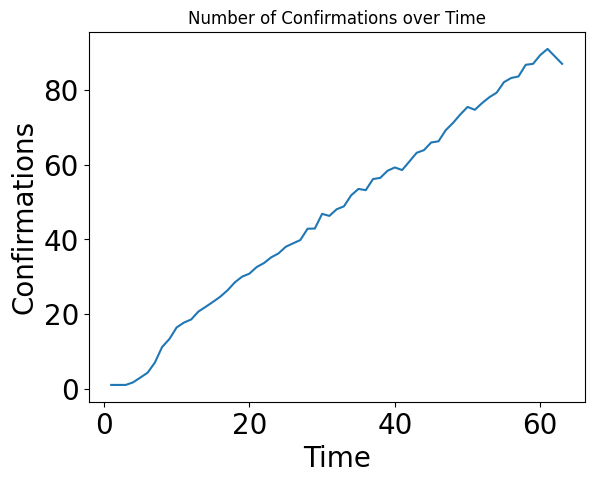

In [8]:
print(results)
df = pd.DataFrame(results)
confirmed = df[1].tolist()
times = df[0].tolist()
plt.plot(times, confirmed)
plt.title('Number of Confirmations over Time')
plt.xlabel('Time')
plt.ylabel('Confirmations')

### Non-PC Tangle

In [11]:
for trial in range(1,11):
    ### Instantiating all the classes   ###
    t2 = Tangle(rate=3, tip_selection='mcmc', plot=True)
    ng2 = node_graph(t2)
    w2 = watcher(t2, ng2, trial)

    ### Adding nodes to the node graph  ###
    for n in range(4):
        ng2.new_node()

    while t2.time < 60:
        node = np.random.randint(0, 4)
        dt_time = np.random.exponential(1.0/t.rate)
        t2.time += dt_time
        ng2.nodes[node].issue_transaction()
        w2.update()
        print(t.time)

    w2.output_to_sheet()

First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000021DDF2EBDA0>]
Edges []
Node IDS [0]
Weights [[0, 913, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000021DDF2EBDA0>, <tangle.node object at 0x0000021DDF3E1CA0>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 913, 1], [1, 307, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000021DDF2EBDA0>, <tangle.node object at 0x0000021DDF3E1CA0>, <tangle.node object at 0x0000021DDF3E1DF0>]
Edges [(1, 0), (2, 0), (2, 1)]
Node IDS [0, 1, 2]
Weights [[0, 913, 1], [1, 307, 1], [2, 2020, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000021DDF2EBDA0>, <tangle.node object at 0x0000021DDF3E1CA0>, <tangle.node object at 0x0000021DDF3E1DF0>, <tangle.node object at 0x0000021DDF36FB60>]
Edges [(1, 0), (2, 0), (2, 1), (3, 1), (3, 2)]
Node IDS [0, 1, 2, 3]
Weights [[0, 913, 1], [1, 307, 1], [2, 2020, 1], [3, 1608, 1]]
------------

[[1, 1.0, 15], [2, 1.0, 14], [3, 1.0, 11], [4, 1.0, 16], [5, 1.0, 12], [6, 1.25, 12], [7, 1.7142857142857142, 14], [8, 2.769230769230769, 13], [9, 3.6, 15], [10, 5.25, 16], [11, 5.466666666666667, 15], [12, 8.75, 16], [13, 10.125, 16], [14, 11.142857142857142, 14], [15, 12.8, 20], [16, 14.0, 9], [17, 15.0, 14], [18, 16.615384615384617, 13], [19, 18.153846153846153, 13], [20, 18.53846153846154, 13], [21, 20.76923076923077, 13], [22, 20.8, 15], [23, 23.416666666666668, 12], [24, 25.066666666666666, 15], [25, 25.5625, 16], [26, 28.470588235294116, 17], [27, 29.846153846153847, 13], [28, 31.571428571428573, 21], [29, 33.42857142857143, 14], [30, 33.833333333333336, 12], [31, 35.69230769230769, 13], [32, 37.166666666666664, 12], [33, 37.53333333333333, 15], [34, 38.666666666666664, 15], [35, 40.23076923076923, 13], [36, 42.44444444444444, 18], [37, 42.53846153846154, 13], [38, 45.0, 17], [39, 46.45454545454545, 11], [40, 47.57142857142857, 21], [41, 49.76470588235294, 17], [42, 49.333333333

Text(0, 0.5, 'Confirmations')

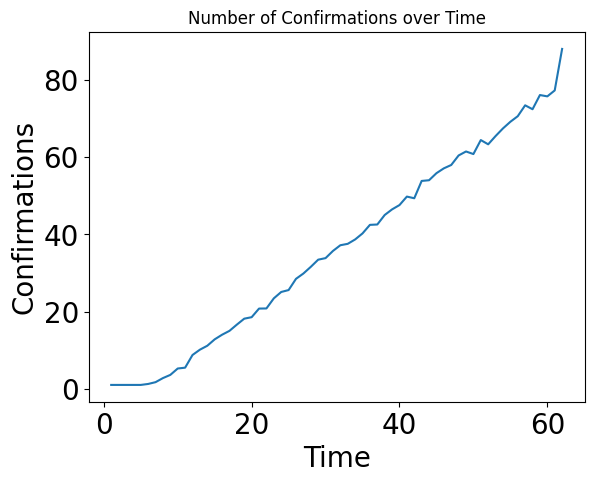

In [14]:
a2 = analyser()
results2 = a2.get_res(10)
df2 = pd.DataFrame(results2)
confirmed2 = df2[1].tolist()
times2 = df2[0].tolist()
plt.plot(times2, confirmed2)
plt.title('Number of Confirmations over Time')
plt.xlabel('Time')
plt.ylabel('Confirmations')